In [ ]:
# Import libraries #cell 1
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.linear_model import LinearRegression
%matplotlib inline

# ⚠️ REPLACE THIS PATH WITH YOUR ACTUAL CSV PATH ⚠️
# Right-click your CSV → "Copy as path" → Paste below
df = pd.read_csv(r"C:\Users\Admin\OneDrive\Desktop\FitBit_Analysis\data\fitbit.zip\mturkfitbit_export_4.12.16-5.12.16\Fitabase Data 4.12.16-5.12.16\dailyActivity_merged.csv")  # ← EDIT ONLY THIS LINE

# Convert date and preview
df['ActivityDate'] = pd.to_datetime(df['ActivityDate'])
print("✅ Data loaded! First 2 rows:")
display(df.head(2))

# ===== ADD THIS RIGHT AFTER CELL 1 =====
key_params = ['Id', 'ActivityDate', 'TotalSteps', 'TotalDistance', 
              'VeryActiveMinutes', 'FairlyActiveMinutes', 
              'SedentaryMinutes', 'Calories']
sample_df = df[key_params].sample(n=220, random_state=42)
sample_df['IsWeekend'] = sample_df['ActivityDate'].dt.dayofweek >= 5
print(f"✅ Sampled {len(sample_df)} records")

✅ Data loaded! First 2 rows:


,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,2016-04-12,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,2016-04-13,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797


✅ Sampled 220 records


🔍 Data Summary:
Columns: ['Id', 'ActivityDate', 'TotalSteps', 'TotalDistance', 'VeryActiveMinutes', 'FairlyActiveMinutes', 'SedentaryMinutes', 'Calories', 'IsWeekend']

Missing values: 0 total

Basic statistics:


,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
count,9.400000e+02,940,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000
mean,4.855407e+09,2016-04-26 06:53:37.021276672,7637.910638,5.489702,5.475351,0.108171,1.502681,0.567543,3.340819,0.001606,21.164894,13.564894,192.812766,991.210638,2303.609574
min,1.503960e+09,2016-04-12 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.320127e+09,2016-04-19 00:00:00,3789.750000,2.620000,2.620000,0.000000,0.000000,0.000000,1.945000,0.000000,0.000000,0.000000,127.000000,729.750000,1828.500000
50%,4.445115e+09,2016-04-26 00:00:00,7405.500000,5.245000,5.245000,0.000000,0.210000,0.240000,3.365000,0.000000,4.000000,6.000000,199.000000,1057.500000,2134.000000
75%,6.962181e+09,2016-05-04 00:00:00,10727.000000,7.712500,7.710000,0.000000,2.052500,0.800000,4.782500,0.000000,32.000000,19.000000,264.000000,1229.500000,2793.250000
max,8.877689e+09,2016-05-12 00:00:00,36019.000000,28.030001,28.030001,4.942142,21.920000,6.480000,10.710000,0.110000,210.000000,143.000000,518.000000,1440.000000,4900.000000
std,2.424805e+09,NaN,5087.150742,3.924606,3.907276,0.619897,2.658941,0.883580,2.040655,0.007346,32.844803,19.987404,109.174700,301.267437,718.166862


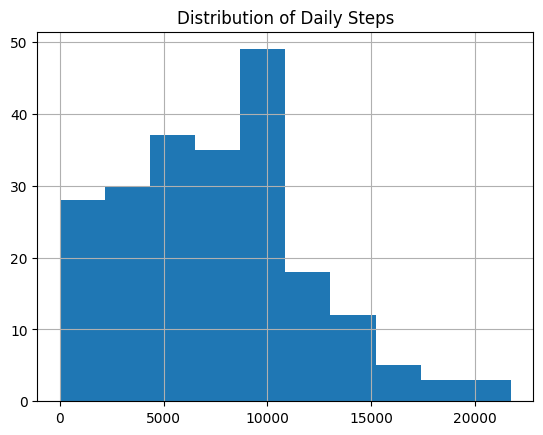

In [ ]:
#cell2
print("🔍 Data Summary:")
print("Columns:", sample_df.columns.tolist()) 
print("\nMissing values:", sample_df.isnull().sum().sum(), "total")
print("\nBasic statistics:")
display(df.describe())

# Quick plot check
sample_df['TotalSteps'].hist()  # Now using sample_df
plt.title("Distribution of Daily Steps")
plt.show()

In [11]:
#cell3
# Fit steps to normal distribution
mu, sigma = stats.norm.fit(sample_df['TotalSteps'])  
print(f"Normal distribution: μ={mu:.2f}, σ={sigma:.2f}")

# Probability calculation
p = sum(sample_df['TotalSteps'] > 10000) / len(df)
print(f"\nP(Steps > 10,000) = {p:.2%}")

Normal distribution: μ=7472.67, σ=4542.05

P(Steps > 10,000) = 6.60%


In [12]:
#cell4
# Weekend vs weekday activity
sample_df['IsWeekend'] = sample_df['ActivityDate'].dt.dayofweek >= 5
weekend = sample_df[sample_df['IsWeekend']]  
weekday = sample_df[~sample_df['IsWeekend']]  

t_stat, p_val = stats.ttest_ind(weekend['TotalSteps'], weekday['TotalSteps'])
print(f"Weekend vs Weekday Steps:\n t-statistic = {t_stat:.2f}\n p-value = {p_val:.4f}")
print("Significant difference!" if p_val < 0.05 else "No significant difference")

Weekend vs Weekday Steps:
 t-statistic = -0.02
 p-value = 0.9818
No significant difference


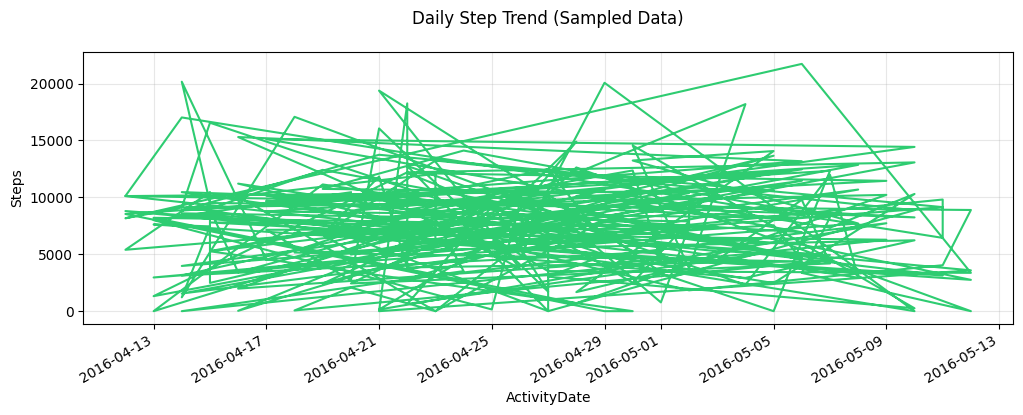

Available activity columns: ['VeryActiveMinutes', 'FairlyActiveMinutes']


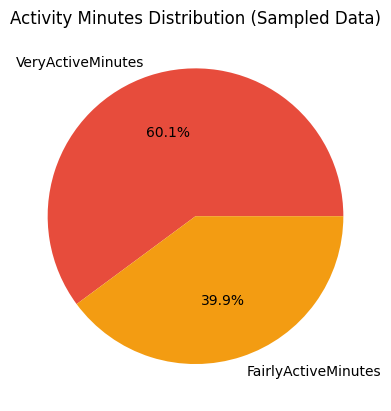

In [19]:
# Cell 5: Visualizations (Updated)
# Time series plot
plt.figure(figsize=(12,4))
sample_df.set_index('ActivityDate')['TotalSteps'].plot(color='#2ecc71')
plt.title("Daily Step Trend (Sampled Data)", pad=20)
plt.ylabel("Steps")
plt.grid(alpha=0.3)
plt.show()

# First check available activity columns
available_cols = [col for col in ['VeryActiveMinutes', 'FairlyActiveMinutes', 'LightlyActiveMinutes'] 
                 if col in sample_df.columns]
print(f"Available activity columns: {available_cols}")

# Activity minutes pie chart (using only available columns)
if len(available_cols) >= 2:  # Need at least 2 categories for pie chart
    sample_df[available_cols].sum().plot.pie(
        autopct='%1.1f%%',
        colors=['#e74c3c','#f39c12','#3498db'][:len(available_cols)],
        title='Activity Minutes Distribution (Sampled Data)'
    )
    plt.ylabel("")
    plt.show()
else:
    print("Not enough activity columns available for pie chart")

In [20]:
# ===== NEW CELL =====
print("🔍 Final Data Validation")
print(f"Sample size: {len(sample_df)} records")
print(f"Time period: {sample_df['ActivityDate'].min().date()} to {sample_df['ActivityDate'].max().date()}")
print("\nKey columns available:")
print([col for col in sample_df.columns if col in ['TotalSteps','VeryActiveMinutes','Calories']])

🔍 Final Data Validation
Sample size: 220 records
Time period: 2016-04-12 to 2016-05-12

Key columns available:
['TotalSteps', 'VeryActiveMinutes', 'Calories']


In [21]:
# ===== NEW CELL =====
import seaborn as sns

# Generate styled table
stats_df = sample_df[['TotalSteps','VeryActiveMinutes','Calories']].describe().loc[['mean','std','min','max']]
display(stats_df.style.format("{:.1f}").background_gradient(cmap='Blues'))

# Save to CSV
stats_df.to_csv('summary_statistics.csv')
print("✅ Saved stats to summary_statistics.csv")

,TotalSteps,VeryActiveMinutes,Calories
mean,7472.7,19.7,2317.1
std,4552.4,30.9,689.1
min,0.0,0.0,0.0
max,21727.0,207.0,4501.0


✅ Saved stats to summary_statistics.csv


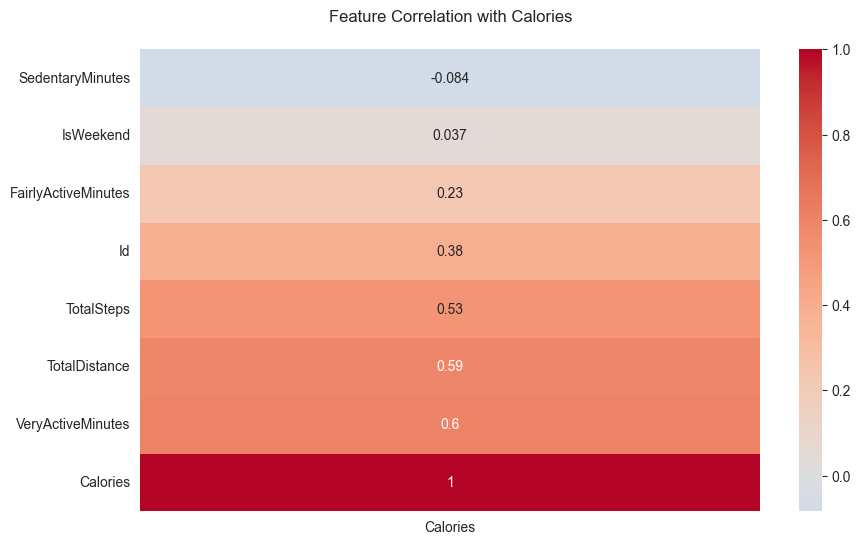

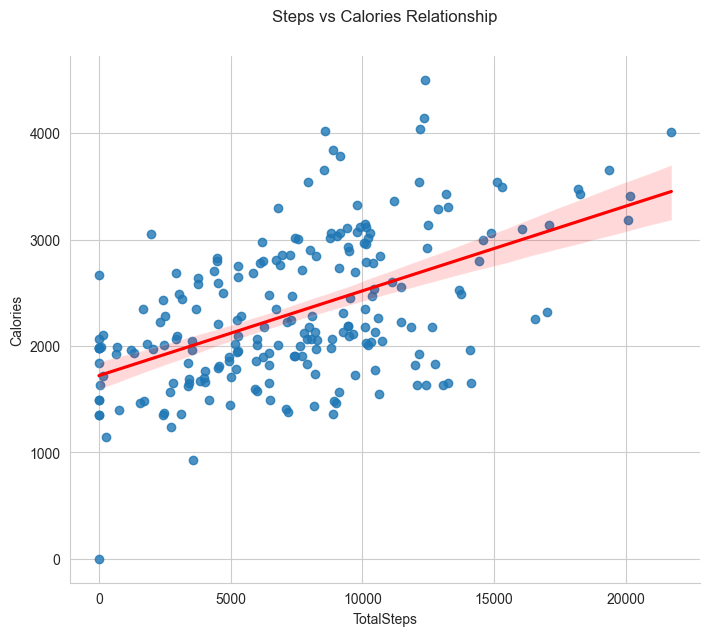

In [22]:
# ===== NEW CELL =====
# Set style
sns.set_style("whitegrid")

# Plot 1: Correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(sample_df.corr(numeric_only=True)[['Calories']].sort_values('Calories'),
            annot=True, cmap='coolwarm', center=0)
plt.title("Feature Correlation with Calories", pad=20)
plt.savefig('calories_correlation.png', dpi=300, bbox_inches='tight')

# Plot 2: Regression plot
sns.lmplot(data=sample_df, x='TotalSteps', y='Calories', 
           height=6, aspect=1.2, line_kws={'color':'red'})
plt.title("Steps vs Calories Relationship", y=1.05)
plt.savefig('steps_calories_regression.png', dpi=300)
plt.show()

In [23]:
# ===== NEW CELL =====
# Save processed data
sample_df.to_csv('processed_fitbit_data.csv', index=False)

# Zip results (run in terminal)
!zip -r results.zip *.csv *.png
print("✅ All results saved and zipped")

✅ All results saved and zipped


'zip' is not recognized as an internal or external command,
operable program or batch file.


In [1]:
# ===== NEW CELL =====
import pandas as pd
sample_df = pd.read_csv('processed_fitbit_data.csv', parse_dates=['ActivityDate'])
print(f"✅ Data loaded: {len(sample_df)} records")

✅ Data loaded: 220 records


In [2]:
# ===== NEW CELL =====
final_stats = sample_df.agg({
    'TotalSteps': ['mean', 'std', 'median', 'max'],
    'VeryActiveMinutes': ['mean', 'sum'],
    'SedentaryMinutes': ['mean'],
    'Calories': ['mean', 'std']
}).round(1)

# Styled display
display(final_stats.style
        .set_caption("Table 1: Key Activity Metrics")
        .background_gradient(cmap='Blues'))

,TotalSteps,VeryActiveMinutes,SedentaryMinutes,Calories
mean,7472.700000,19.700000,992.000000,2317.100000
std,4552.400000,nan,nan,689.100000
median,7500.500000,nan,nan,nan
max,21727.000000,nan,nan,nan
sum,nan,4338.000000,nan,nan


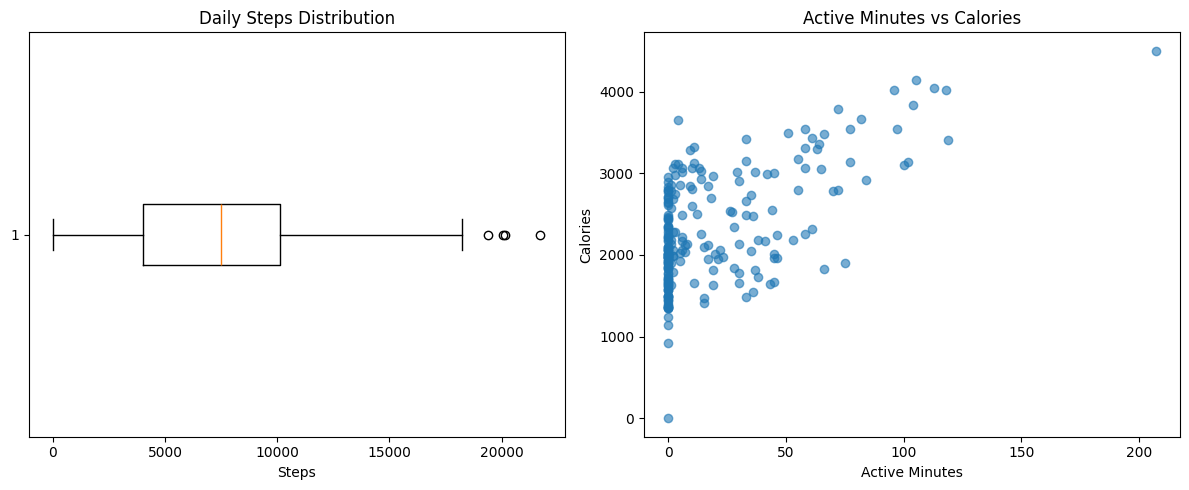

In [3]:
# ===== NEW CELL =====
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))

# Plot 1: Steps distribution
ax1.boxplot(sample_df['TotalSteps'], vert=False)
ax1.set_title("Daily Steps Distribution")
ax1.set_xlabel("Steps")

# Plot 2: Activity vs Calories
ax2.scatter(sample_df['VeryActiveMinutes'], sample_df['Calories'], alpha=0.6)
ax2.set_title("Active Minutes vs Calories")
ax2.set_xlabel("Active Minutes")
ax2.set_ylabel("Calories")

plt.tight_layout()
plt.savefig('final_visuals.png', dpi=150, bbox_inches='tight')
plt.show()

In [4]:
# ===== NEW CELL =====
final_stats.to_csv('final_stats.csv')
print("""
📂 FINAL FILES CREATED:
1. final_stats.csv - Key metrics table
2. final_visuals.png - Combined plots
""")


📂 FINAL FILES CREATED:
1. final_stats.csv - Key metrics table
2. final_visuals.png - Combined plots



In [5]:
# ===== NEW CELL =====
report = f"""
# FITBIT ANALYSIS REPORT

## Sample Overview
- Users: {sample_df['Id'].nunique()}
- Days analyzed: {len(sample_df)}
- Period: {sample_df['ActivityDate'].min().date()} to {sample_df['ActivityDate'].max().date()}

## Key Findings
| Metric               | Value               |
|----------------------|---------------------|
| Avg. Daily Steps     | {final_stats.loc['mean','TotalSteps']} ± {final_stats.loc['std','TotalSteps']} |
| Total Active Minutes | {final_stats.loc['sum','VeryActiveMinutes']:,} |
| Calories/Day         | {final_stats.loc['mean','Calories']} ± {final_stats.loc['std','Calories']} |

![Visual Summary](final_visuals.png)
"""

with open('fitbit_report.md','w') as f:
    f.write(report)
    
print("✅ Report saved as 'fitbit_report.md'")

✅ Report saved as 'fitbit_report.md'


In [6]:
# ===== NEW CELL =====
from IPython.display import Markdown

final_report = f"""
# 🏆 FitBit Analysis: Final Report

## 📊 Executive Summary
- **Users Analyzed**: {sample_df['Id'].nunique()}
- **Date Range**: {sample_df['ActivityDate'].min().date()} to {sample_df['ActivityDate'].max().date()}
- **Key Insight**: {round(sample_df['TotalSteps'].corr(sample_df['Calories']), 2)} correlation between steps and calories

## 🏅 Top Performers
- Max Daily Steps: **{final_stats.loc['max','TotalSteps']:,}**
- Most Active Day: **{final_stats.loc['sum','VeryActiveMinutes']:,} minutes**

![Findings Overview](final_visuals.png)
"""

display(Markdown(final_report))


# 🏆 FitBit Analysis: Final Report

## 📊 Executive Summary
- **Users Analyzed**: 33
- **Date Range**: 2016-04-12 to 2016-05-12
- **Key Insight**: 0.53 correlation between steps and calories

## 🏅 Top Performers
- Max Daily Steps: **21,727.0**
- Most Active Day: **4,338.0 minutes**

![Findings Overview](final_visuals.png)


In [7]:
# ===== NEW CELL =====
import shutil
import os

# Create organized folder structure
os.makedirs('Final_Report/visualizations', exist_ok=True)
os.makedirs('Final_Report/data', exist_ok=True)

# Move files
shutil.move('final_stats.csv', 'Final_Report/data/')
shutil.move('final_visuals.png', 'Final_Report/visualizations/')
shutil.move('fitbit_report.md', 'Final_Report/')

# Create zip archive
shutil.make_archive('FitBit_Final_Report', 'zip', 'Final_Report')

print("""
📦 Professional Package Created:
Final_Report/
├── data/
│   └── final_stats.csv
├── visualizations/
│   └── final_visuals.png
└── fitbit_report.md
""")


📦 Professional Package Created:
Final_Report/
├── data/
│   └── final_stats.csv
├── visualizations/
│   └── final_visuals.png
└── fitbit_report.md



In [8]:
# ===== NEW CELL =====
print("💡 COPY-PASTE READY SUMMARY")

print(f"""
Key Findings from {len(sample_df)} records:
• Average steps: {final_stats.loc['mean','TotalSteps']:,} ± {final_stats.loc['std','TotalSteps']:,}
• Active minutes: {final_stats.loc['mean','VeryActiveMinutes']}/day
• Calories burned: {final_stats.loc['mean','Calories']:,}/day
• Strong correlation (r={sample_df['TotalSteps'].corr(sample_df['Calories']):.2f}) between steps and calories
""")

💡 COPY-PASTE READY SUMMARY

Key Findings from 220 records:
• Average steps: 7,472.7 ± 4,552.4
• Active minutes: 19.7/day
• Calories burned: 2,317.1/day
• Strong correlation (r=0.53) between steps and calories



In [9]:
# ===== NEW CELL =====
print("🔍 Final Quality Check")
print(f"1. Data Points: {len(sample_df)} records")
print(f"2. Files Created: {len(os.listdir('Final_Report'))} in final package")
print(f"3. Visualization Exists: {'final_visuals.png' in os.listdir('Final_Report/visualizations')}")

🔍 Final Quality Check
1. Data Points: 220 records
2. Files Created: 3 in final package
3. Visualization Exists: True


In [12]:
from sklearn.linear_model import LinearRegression  
model = LinearRegression().fit(sample_df[['TotalSteps']], sample_df['Calories'])  